In [1]:
#%% Import
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#%% Part 1: Simulate an arithmetic Brownian motion dX(t) = mu*dt + sigma*dW(t)

# Define parameters and time grid
npaths = 20000 # number of paths
T = 1 # time horizon
nsteps = 200 # number of steps
dt = T/nsteps # time step
t = np.linspace(0,1, num=200+1)

# Model parameters
mu, sigma = 0.2, 0.4
X0 = 1 #inital stock price at t=0

## ABM
# Compute the increments
dX = np.empty([nsteps+1,npaths])
dX[0,:] = X0
dX[1:,:] = mu*dt + sigma*np.sqrt(dt)*np.random.randn(nsteps,npaths)

# Cumulate the increments
X = np.cumsum(dX,axis =0)

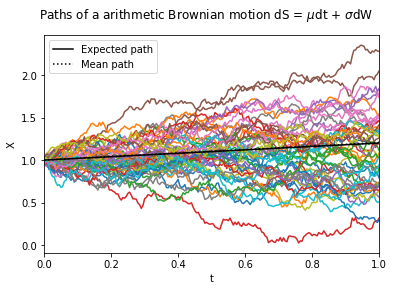

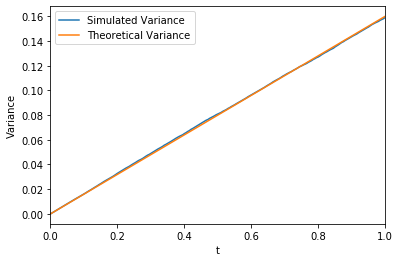

In [3]:
#%% Part 2: Plot Theoretical and Simulated values of E(X) and V(X)

# Compute theoretical expected value
EX = X0+mu*t

# Estimate mean of the simulations
SimulatedMean = np.mean(X,1)

# Plot the simulated paths, expected value and sample mean
fig, ax = plt.subplots()
fig.suptitle(r'Paths of a arithmetic Brownian motion dS = $\mu$dt + $\sigma$dW')
ax.plot(t,X[:,::400])
ax.plot(t,EX,'k',label = 'Expected path')
ax.plot(t,SimulatedMean,'k:',label ='Mean path')
ax.set(xlim=[0,1], xlabel='t', ylabel='X')
ax.legend()


# Compute theoretical Variance
VAR = sigma**2*t

# Estimate variance of the simulations
SimulatedVar=np.var(X,1)

#Plot the Time Series and also plot the asymptote in the limit
fig, ax = plt.subplots()
ax.plot(t,SimulatedVar,label = 'Simulated Variance')
ax.plot(t,VAR,label = 'Theoretical Variance')
ax.set(xlim=[0,1], xlabel='t', ylabel='Variance')
ax.legend()

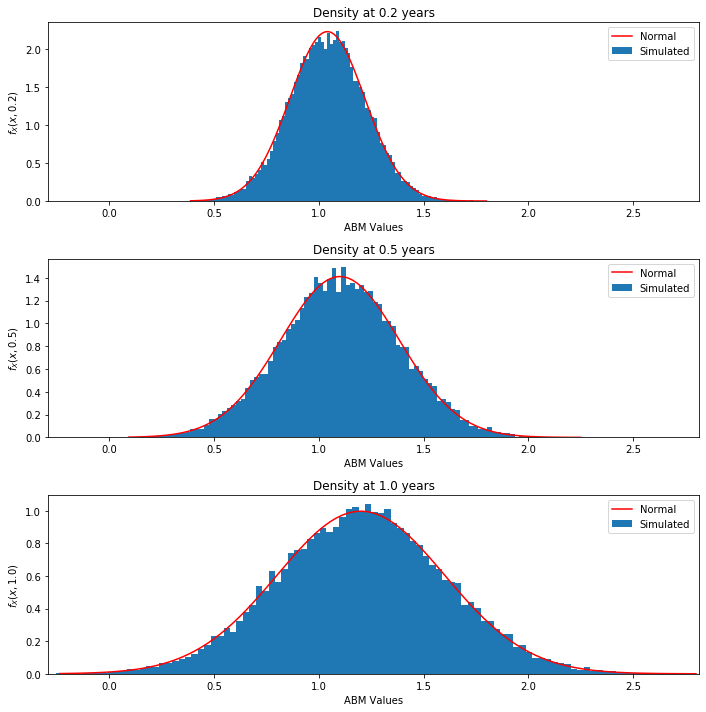

In [8]:
#%% Part 3: Plot the probability density function at different horizons
# We compare the simulated distribution of the process with the Gaussian density with the same mean and variance.


#F ix the range of the plot and the number of points
nbins = 100
minv = np.min(X)
maxv = np.max(X)

# Fit the times at which to plot the densities
horizon = [40,100,200]

SD = np.sqrt(VAR)

# PDF of a ABM at different times
fig, ax = plt.subplots(3,figsize=(10,10))

for i,item in enumerate(horizon):

    #Empirical Distribution
    count,bins = np.histogram(X[item,:],bins=nbins)
    bin_centers = (bins[:-1] + bins[1:])*0.5
    widths = bins[1:] - bins[:-1]
    f = count/(np.sum(count)*widths)
    ax[i].bar(bin_centers,f,label="Simulated",width=widths)


    #Theoretical Distribution
    f = norm.pdf(bin_centers,loc = EX[item], scale = SD[item])
    ax[i].plot(bin_centers,f,'r',label ='Normal')

    #Formatting
    ax[i].set(xlim=[minv,maxv],xlabel='ABM Values', ylabel='$f_X(x,%s)$' %(item/200),
    title = "Density at %s years" %(item/200))
    ax[i].legend()

plt.tight_layout()


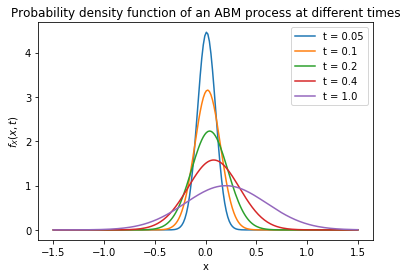

In [9]:
#%% Part 4: Time Evolution of the Density

#Assign number of bins and edges
minv, maxv, nbins = -1.5,1.5,200
x = np.linspace(minv,maxv,nbins)

#Time horizon
t2 = np.array([0.05, 0.1, 0.2, 0.4, 1])

#Theoretical expected value and standard deviation
EX2 = mu*t2
SD2 = np.sqrt(sigma**2*t2)

# Build theoretical pdf at each time step and then plot
f = np.zeros([len(x),len(t2)])
fig, ax = plt.subplots()
for i in range(len(t2)):
    f[:,i] = norm.pdf(x, scale = SD2[i],loc = EX2[i]) #see book
    ax.plot(x,f[:,i], label = 't = %s' %t2[i])

ax.set(xlabel='x', ylabel='$f_X(x,t)$',
       title='Probability density function of an ABM process at different times')
ax.legend()

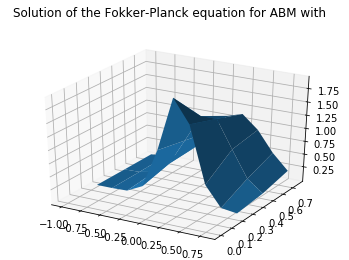

In [10]:
#%% Part 5: Plotting the Distribution of ABM
# 2D plot at a certain time (keeping t constant) would be the histogram
from mpl_toolkits.mplot3d import Axes3D
import math as m
fig = plt.figure()
fig.suptitle('Solution of the Fokker-Planck equation for ABM')
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(-1, 1, 0.2)
t = np.arange(-0, 1, 0.25)
x, t = np.meshgrid(x, t)

D = sigma**2/2
f = 1/(2*np.sqrt(m.pi*D*t))*np.exp(-(x-mu*t)**2/(4*D*t))

ax.plot_wireframe(x,t,f)
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('f')

ax = plt.axes(projection='3d')
ax.plot_surface(x,t,f, rstride=1, cstride=1)